# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [1]:
import nltk

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

In [2]:
import json
import os
import pandas as pd
import re
import urllib

# URL of the CSV file
rappers_url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/main/files/Rappers.csv'

# Reading the CSV file into a pandas DataFrame
df_rappers = pd.read_csv(rappers_url)

In [3]:
df_rappers

,WikipediaPageName,Coast
0,6ix9ine,East
1,9th Prince,East
2,22Gz,East
3,38 Spesh,East
4,The 45 King,East
...,...,...
796,Young L,West
797,Yukmouth,West
798,Arif Zahir,West
799,Zealous1,West


In [4]:
# Wikipedia API base URL
wiki_api_base = "https://en.wikipedia.org/w/api.php"

# Define function to fetch the wikipedia page content using the API
def get_clean_wiki_content(page_title):
    # Encoding page title to be URL safe (no spaces etc.)
    page_title_encoded = urllib.parse.quote_plus(page_title.replace(' ', '_'))
    query = f"{wiki_api_base}?action=query&prop=extracts&exlimit=1&explaintext=1&format=json&titles={page_title_encoded}"

    with urllib.request.urlopen(query) as url:
        data = json.loads(url.read().decode())
        page = next(iter(data['query']['pages'].values()))
        content = page['extract'] if 'extract' in page else ''
 
    return content

# Directory to save the text files
if not os.path.exists('rappers_text'):
    os.makedirs('rappers_text')

for rapper_name in df_rappers['WikipediaPageName']:
    print(f"Fetching content for {rapper_name}...")
    page_content = get_clean_wiki_content(rapper_name)

    # Clean the filename using a regular expression to replace invalid characters with "_"
    clean_filename = re.sub(r'[^a-zA-Z0-9_]', '_', rapper_name)
    
    # Save to a text file
    with open(f"rappers_text/{clean_filename}.txt", 'w', encoding='utf-8') as file:
        file.write(page_content)

Fetching content for 6ix9ine...
Fetching content for 9th Prince...
Fetching content for 22Gz...
Fetching content for 38 Spesh...
Fetching content for The 45 King...
Fetching content for 50 Cent...
Fetching content for 60 Second Assassin (rapper)...
Fetching content for 88-Keys...
Fetching content for Sammy Adams...
Fetching content for Adeem (rapper)...
Fetching content for Aesop Rock...
Fetching content for Afu-Ra...
Fetching content for Akir...
Fetching content for Akrobatik...
Fetching content for Alias (musician)...
Fetching content for Hoodie Allen...
Fetching content for Amil...
Fetching content for Antoinette (rapper)...
Fetching content for Aone Beats...
Fetching content for Apache (rapper)...
Fetching content for Apathy (rapper)...
Fetching content for AR-Ab...
Fetching content for AraabMuzik...
Fetching content for Arkatech Beatz...
Fetching content for M. K. Asante...
Fetching content for Asheru...
Fetching content for The Audible Doctor...
Fetching content for Awkwafina...


In [5]:
# Print the list of files saved
saved_files = os.listdir('rappers_text')
print(saved_files)

['03_Greedo.txt', '22Gz.txt', '24kGoldn.txt', '38_Spesh.txt', '40_Glocc.txt', '50_Cent.txt', '60_Second_Assassin__rapper_.txt', '6ix9ine.txt', '88_Keys.txt', '9th_Prince.txt', 'Abstract_Rude.txt', 'Ab_Soul.txt', 'Aceyalone.txt', 'Action_Bronson.txt', 'Adam_Hicks.txt', 'Adeem__rapper_.txt', 'Aesop_Rock.txt', 'Afrika_Bambaataa.txt', 'Afroman.txt', 'Afu_Ra.txt', 'Ahmad__rapper_.txt', 'Akir.txt', 'Akrobatik.txt', 'Ak_Sent.txt', 'Alex_Skolnick.txt', 'Alias__musician_.txt', 'Ali_Shaheed_Muhammad.txt', 'Ali_Tabatabaee.txt', 'Ali_Vegas.txt', 'Aloe_Blacc.txt', 'Alrad_Lewis.txt', 'Al_Sherrod_Lambert.txt', 'Amanda_Seales.txt', 'Amber_Liu__singer_.txt', 'AMG__rapper_.txt', 'Amil.txt', 'Amin___rapper_.txt', 'Andre_Harrell.txt', 'Andy_Mineo.txt', 'Antoinette__rapper_.txt', 'Antwon.txt', 'Ant_Banks.txt', 'Aone_Beats.txt', 'Apache__rapper_.txt', 'Apani_B__Fly.txt', 'Apathy__rapper_.txt', 'AraabMuzik.txt', 'Arif_Zahir.txt', 'Arkatech_Beatz.txt', 'AR_Ab.txt', 'Asaiah_Ziv.txt', 'ASAP_Ferg.txt', 'ASAP_Nas


> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [6]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.text import Text

# Ensure the directory is correct
corpus_root = 'rappers_text/'

# Print all files in the directory
print("Files in the directory:")
for filename in os.listdir(corpus_root):
    print(filename)

# Ensure df_rappers contains the correct data
print("\nDataFrame content:")
print(df_rappers.head())

# Create a list of file names
file_list = [f"{re.sub(r'[^a-zA-Z0-9_]', '_', rapper_name)}.txt" for rapper_name in df_rappers['WikipediaPageName']]

# Print the generated file list
print("\nGenerated file list:")
print(file_list)

# Use PlaintextCorpusReader to read the corpus
rapper_corpus = PlaintextCorpusReader(corpus_root, file_list)

# Print the files in the corpus to check if everything is correct
print("\nFiles in the corpus:")
print(rapper_corpus.fileids())

# Convert the corpus into NLTK Text objects
rapper_texts = Text(rapper_corpus.words())

Files in the directory:
03_Greedo.txt
22Gz.txt
24kGoldn.txt
38_Spesh.txt
40_Glocc.txt
50_Cent.txt
60_Second_Assassin__rapper_.txt
6ix9ine.txt
88_Keys.txt
9th_Prince.txt
Abstract_Rude.txt
Ab_Soul.txt
Aceyalone.txt
Action_Bronson.txt
Adam_Hicks.txt
Adeem__rapper_.txt
Aesop_Rock.txt
Afrika_Bambaataa.txt
Afroman.txt
Afu_Ra.txt
Ahmad__rapper_.txt
Akir.txt
Akrobatik.txt
Ak_Sent.txt
Alex_Skolnick.txt
Alias__musician_.txt
Ali_Shaheed_Muhammad.txt
Ali_Tabatabaee.txt
Ali_Vegas.txt
Aloe_Blacc.txt
Alrad_Lewis.txt
Al_Sherrod_Lambert.txt
Amanda_Seales.txt
Amber_Liu__singer_.txt
AMG__rapper_.txt
Amil.txt
Amin___rapper_.txt
Andre_Harrell.txt
Andy_Mineo.txt
Antoinette__rapper_.txt
Antwon.txt
Ant_Banks.txt
Aone_Beats.txt
Apache__rapper_.txt
Apani_B__Fly.txt
Apathy__rapper_.txt
AraabMuzik.txt
Arif_Zahir.txt
Arkatech_Beatz.txt
AR_Ab.txt
Asaiah_Ziv.txt
ASAP_Ferg.txt
ASAP_Nast.txt
ASAP_Rocky.txt
ASAP_Twelvyy.txt
Asheru.txt
Asher_Roth.txt
Ash_Riser.txt
Awkwafina.txt
Azealia_Banks.txt
Aztlan_Underground.txt
A

In [7]:
# Print the first 500 words from the corpus
print("\nFirst 500 words from the corpus:")
print(rapper_texts[:500])


First 500 words from the corpus:
['Daniel', 'Hernandez', '(', 'born', 'May', '8', ',', '1996', '),', 'known', 'professionally', 'as', '6ix9ine', '(', 'stylized', '6IX9INE', 'and', 'pronounced', '"', 'six', 'nine', '")', 'and', 'also', 'as', 'Tekashi69', ',', 'is', 'an', 'American', 'rapper', '.', 'His', 'music', 'has', 'been', 'marked', 'by', 'an', 'aggressive', 'style', 'of', 'rapping', ',', 'while', 'his', 'controversial', 'public', 'persona', 'is', 'characterized', 'by', 'his', 'distinctive', 'rainbow', '-', 'colored', 'hair', ',', 'extensive', 'tattoos', ',', 'legal', 'issues', ',', 'and', 'publicized', 'celebrity', 'feuds', '.', 'Hernandez', 'became', 'widely', 'known', 'in', '2017', 'after', 'his', 'feature', 'on', 'Trippie', 'Redd', "'", 's', '"', 'Poles', '1469', '"', 'and', 'the', 'release', 'of', 'his', 'debut', 'solo', 'single', ',', '"', 'Gummo', '",', 'which', 'was', 'a', 'sleeper', 'hit', '.', 'He', 'subsequently', 'released', 'the', 'mixtape', 'Day69', '(', '2018', '),'

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.


In [8]:
# Concordence method is used to find every occurence of a specific word along with some context

# Using the method with the word 'music'
rapper_texts.concordance('music')

Displaying 25 of 3788 matches:
ashi69 , is an American rapper . His music has been marked by an aggressive sty
 to help his mother financially . == Music career == === 2012 – 2016 : Early ca
ve rapping style and use of anime as music video visuals . Many of his early so
 songs were released by FCK THEM , a music label based in Slovakia . He adopted
ho had previously worked with him on music videos to work on videos again along
s to work on videos again along with music . === 2017 – 2018 : Day69 and Dummy 
ooting , Hernandez stopped releasing music for several months , before releasin
ed a publishing deal with LA - based music company Create Music Group . In earl
with LA - based music company Create Music Group . In early October 2018 , Hern
bum . === 2019 – present : Return to music and TattleTales === In October 2019 
May 8 , 2020 , marking his return to music and on his 24th birthday . The song 
 " Gooba ", was released alongside a music video . According to Pitchfork ' s M
ented the

> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).

- `similar` method finds words that appear in a similar context or range of contexts as the specified word
- `common_contexts` examines the contexts that are shared by two or more words


In [9]:
rapper_texts.similar('music')

the album songs and rap life in career it production tracks song work
time lyrics albums death record film style


In [10]:
rapper_texts.common_contexts(['music', 'rap'])

a_video the_industry his_career the_and best_video first_video
her_career to_and the_business of_in a_career s_was best_group of_and
to_by of_to taking_seriously to_at dance_and of_including


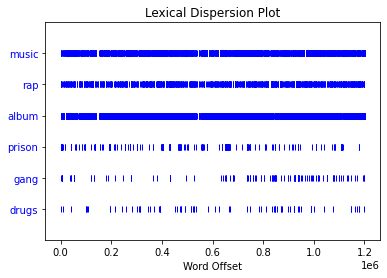

In [11]:
import matplotlib.pyplot as plt

# Dispersion plot for a set of words
rapper_texts.dispersion_plot(['music', 'rap', 'album', 'prison', 'gang', 'drugs'])

plt.show()

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.

**Solution:**
- A bigram is a sequence of two adjecent elements (words or letters) from a string of tokens.
- Collocations are the occurrence of two or more words that appear often together (more than random). 

Thus, **a bigram** can be seen as a **collocation** when it appears more frequently than would be expected by chance.


In [12]:
# nltk.download('stopwords')

rapper_texts.collocations()

New York; hip hop; External links; Los Angeles; studio album; stage
name; Billboard 200; Hot 100; American rapper; music video; Hip Hop;
Early life; Snoop Dogg; United States; York City; better known; debut
album; Billboard Hot; High School; Def Jam


> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?


In [13]:
h_words = sorted([w for w in rapper_texts if w.startswith('h')])

# Print the first 5 in alphabetical order
print(h_words[:25])

['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h10010005', 'hEARTS', 'ha', 'ha', 'ha', 'habit', 'habit', 'habits', 'hackathon', 'hacked']


> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [14]:
index_snoop = rapper_texts.index('Snoop')

# Print the sentence containing the word 'Snoop'
print(' '.join(rapper_texts[index_snoop - 5 : index_snoop + 6]))

Air Tonight ", performed by Snoop Dogg , Chris Stapleton ,


> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [15]:
uppercase_words = [w for w in rapper_texts if w.isupper()]

sorted_uppercase_words = sorted(uppercase_words, key=len, reverse=True)

for word in sorted_uppercase_words[:5]:
    print(word)


CHRISTMAKWHANNUVUSWALIYEARS
SHINIGAMISTARSHIP
AREYOUREADYKIDS
MERRYPOCALYPSE
CHAMILLIONAIRE


> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?


In [16]:
total_tokens = len(rapper_texts)

distinct_tokens = len(set(rapper_texts))

print(f"Total tokens: {total_tokens}")
print(f"Distinct tokens: {distinct_tokens}")

Total tokens: 1202583
Distinct tokens: 42699


> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.


In [17]:
from nltk.tokenize import word_tokenize
import pickle

# Compute lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

## Tokenize the texts before passing them to the lexical_diversity function
# tokenized_rapper_texts = word_tokenize(' '.join(rapper_texts))
with open('tokenized_rapper_texts.pkl', 'rb') as f:
    tokenized_rapper_texts = pickle.load(f)

# Lexical diversity of the rapper Wikipedia text
lex_div = lexical_diversity(tokenized_rapper_texts)
print(f"Lexical diversity: {lex_div}")

# Lexical diversity of the rapper Wikipedia text
lex_div = lexical_diversity(rapper_texts)
print(f"Lexical diversity: {lex_div}")

Lexical diversity: 0.03481020981136045
Lexical diversity: 0.03550607317748546


In [18]:
# A dictionary to hold rappers' texts by coast
rappers_texts_by_coast = {'East': [], 'West': []}

for index, row in df_rappers.iterrows():
    coast = row['Coast']
    rapper_name = row['WikipediaPageName']

    # Fetch the text (I'm using your existing function here)
    page_content = get_clean_wiki_content(rapper_name.replace(' ', '_'))

    # Add the text to the appropriate list in the dictionary
    rappers_texts_by_coast[coast].append(page_content)

In [19]:
# Tokenize the texts by coast
# tokenized_east_coast_texts = word_tokenize(' '.join(rappers_texts_by_coast['East']))
with open('tokenized_east_coast_texts.pkl', 'rb') as f:
    tokenized_east_coast_texts = pickle.load(f)

# tokenized_west_coast_texts = word_tokenize(' '.join(rappers_texts_by_coast['West']))
with open('tokenized_west_coast_texts.pkl', 'rb') as f:
    tokenized_west_coast_texts = pickle.load(f)

# Compute lexical diversity for East Coast and West Coast rappers
east_coast_lex_div = lexical_diversity(tokenized_east_coast_texts)
west_coast_lex_div = lexical_diversity(tokenized_west_coast_texts)

print(f"East Coast Lexical Diversity: {east_coast_lex_div}")
print(f"West Coast Lexical Diversity: {west_coast_lex_div}")

East Coast Lexical Diversity: 0.05280237518170617
West Coast Lexical Diversity: 0.06704353181717232


> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 


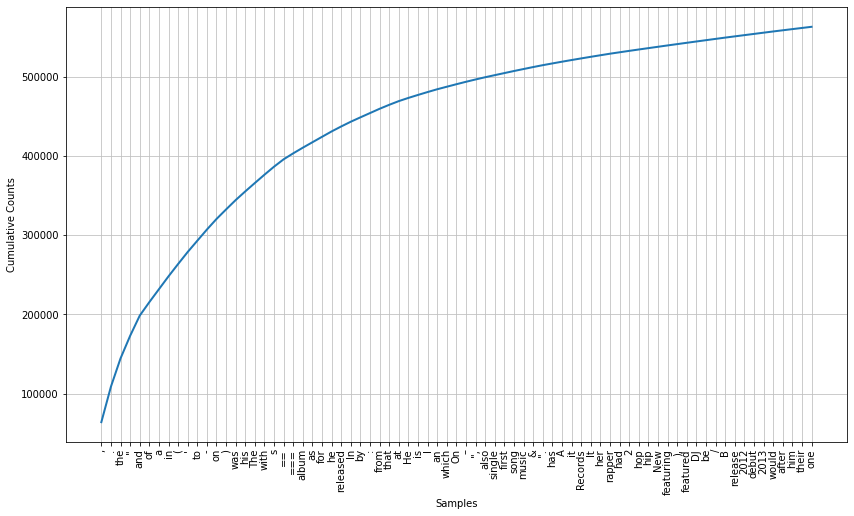

In [20]:
from nltk.probability import FreqDist

# Create frequency distribution
fdist = FreqDist(rapper_texts)

plt.figure(figsize=(14,8))
fdist.plot(75, cumulative=True)
plt.show()

> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.


In [21]:
four_letter_words = [w for w in rapper_texts if len(w) == 4]

# Create a frequency distribution of four-letter tokens
fdist_four_letters = FreqDist(four_letter_words)

# Print four-letter tokens in decreasing order of frequency
fdist_four_letters.pprint()

FreqDist({'with': 10483, 'from': 5411, 'that': 5001, 'also': 2811, 'song': 2614, '2012': 1554, '2013': 1548, '2011': 1453, '2016': 1373, '2014': 1355, ...})


> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?


In [22]:
# Total number of characters in the text
total_characters = sum(len(w) for w in rapper_texts)

# Total number of tokens in the text
total_tokens = len(rapper_texts)

# Calculating the average token length
average_token_length = total_characters / total_tokens if total_tokens != 0 else 0  # added a condition to avoid division by zero

print(f"Average token length: {average_token_length}")

Average token length: 3.8775627129270913


> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

In [24]:
def vocab_size(text):
    """
    Returns the vocabulary size of the text.

    Parameters:
    text (list or nltk.Text): The text to analyze.

    Returns:
    int: The vocabulary size.
    """
    return len(set(text))

# Applying the vocab_size function to the rapper Wikipedia text
rapper_wiki_vocab_size = vocab_size(rapper_texts)  # replace rapperWiki with your actual text data
print(f"Vocabulary Size of the Rapper Wikipedia Text: {rapper_wiki_vocab_size}")

Vocabulary Size of the Rapper Wikipedia Text: 42699


In [29]:
def percent(word, text):
    """
    Calculates how often a given word occurs in a text, and expresses the result as a percentage.

    Parameters:
    word (str): The word to calculate the percentage for.
    text (list or nltk.Text): The text to analyze.

    Returns:
    float: The percentage of the word in the text.
    """
    word_frequency = text.count(word)
    total_words = len(text)
    percentage = 100 * word_frequency / total_words if total_words != 0 else 0  # added a condition to avoid division by zero
    return percentage

# Applying the percent function to compute the percentage for "Dre" in the rapper Wikipedia text
dre_percentage = percent("Dre", rapper_texts)  # replace rapperWiki with your actual text data
print(f"Percentage of the word 'Dre' in the Rapper Wikipedia Text: {dre_percentage}%")


Percentage of the word 'Dre' in the Rapper Wikipedia Text: 0.05696072537197017%


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>